In [2]:
import numpy as np
import pandas as pd


In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_theme(style="whitegrid")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
cardio = pd.read_csv('cardio_train (1).csv', encoding='unicode_escape')
cardio = cardio[cardio.columns.difference(['index'])]
cardio.head(70000)

,Active,Age,Alco,Ap_Hi,Ap_lo,Cholesterol,Gender,Gluc,Height,Smoke,Weight,cardio,cardio_train
0,1,18393,0,110,80,1,2,1,168,0,62.0,0,0
1,1,20228,0,140,90,3,1,1,156,0,85.0,1,1
2,0,18857,0,130,70,3,1,1,165,0,64.0,1,2
3,1,17623,0,150,100,1,2,1,169,0,82.0,1,3
4,0,17474,0,100,60,1,1,1,156,0,56.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1,19240,0,120,80,1,2,1,168,1,76.0,0,99993
69996,1,22601,0,140,90,2,1,2,158,0,126.0,1,99995
69997,0,19066,1,180,90,3,2,1,183,0,105.0,1,99996
69998,0,22431,0,135,80,1,1,2,163,0,72.0,1,99998


In [6]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Relationship between Diastolic Pressure and Weight')

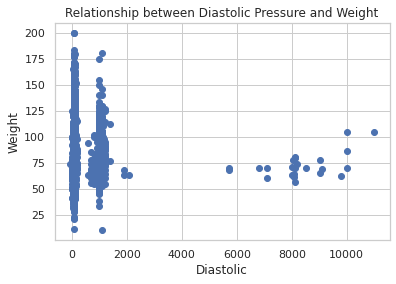

In [25]:
plt.scatter(cardio.Ap_lo, cardio.Weight)
plt.xlabel("Diastolic")
plt.ylabel("Weight")
plt.title("Relationship between Weight and Diastolic Pressure")

Text(0.5, 1.0, 'Relationship between Weight and Systolic Pressure')

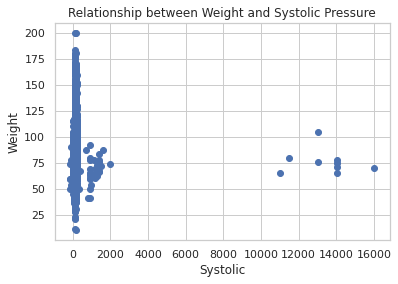

In [27]:
plt.scatter(cardio.Ap_Hi, cardio.Weight)
plt.xlabel("Systolic")
plt.ylabel("Weight")
plt.title("Relationship between Weight and Systolic Pressure")

In [8]:
import seaborn as sns
sns.set_theme(style = "whitegrid")

Text(0.5, 1.0, 'Linear Regression between Weight and Diastolic Pressure')

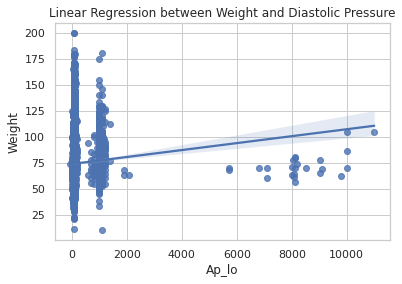

In [31]:
sns.regplot(y="Weight", x="Ap_lo", data=cardio, fit_reg= True)
plt.title("Linear Regression between Weight and Diastolic Pressure")

Text(0.5, 1.0, 'Linear Regression between Weight and Systolic Pressure')

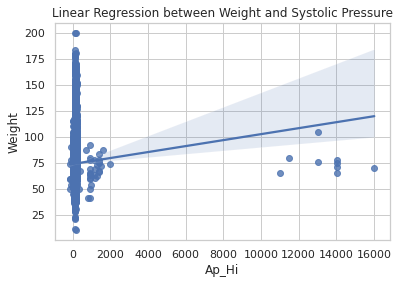

In [32]:
sns.regplot(y="Weight", x="Ap_Hi", data=cardio, fit_reg= True)
plt.title("Linear Regression between Weight and Systolic Pressure")

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [26]:
m= ols('Ap_lo ~ Weight', cardio).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ap_lo   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     134.0
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           5.86e-31
Time:                        04:41:06   Log-Likelihood:            -4.6598e+05
No. Observations:               70000   AIC:                         9.320e+05
Df Residuals:                   69998   BIC:                         9.320e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.1656      3.737     14.495      0.0

In [29]:
m= ols('Ap_Hi ~ Weight', cardio).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ap_Hi   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     66.04
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           4.48e-16
Time:                        04:49:49   Log-Likelihood:            -4.5188e+05
No. Observations:               70000   AIC:                         9.038e+05
Df Residuals:                   69998   BIC:                         9.038e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    104.4434      3.055     34.186      0.0

In [33]:
from sklearn.linear_model import LinearRegression
X = cardio.drop('Ap_Hi', axis = 1)
lm = LinearRegression()
lm

LinearRegression()

In [34]:
lm.fit(X, cardio.Ap_Hi)

LinearRegression()

In [35]:
print('Estimated intercept coeficient:', lm.intercept_)

Estimated intercept coeficient: 91.18552005095108


In [36]:
print('Number of coefficients', len(lm.coef_))

Number of coefficients 12


In [37]:
zip(X.columns, lm.coef_)

In [38]:
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,Active,0.738531
1,Age,0.000433
2,Alco,0.298945
3,Ap_lo,0.009626
4,Cholesterol,2.075022
5,Gender,1.237762
6,Gluc,0.190981
7,Height,-0.003209
8,Smoke,-1.526515
9,Weight,0.210434


In [39]:
lm.predict(X)[0:5]

array([117.90299938, 140.86682875, 134.89449369, 136.25050534,
       114.11246355])

Text(0.5, 1.0, 'Ap_Hi vs Predicted Ap_Hi')

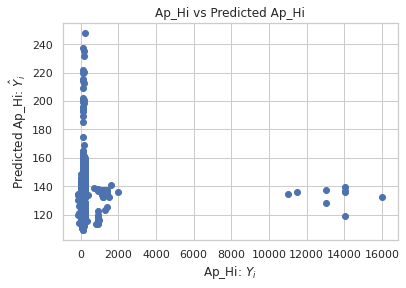

In [40]:
plt.scatter(cardio.Ap_Hi, lm.predict(X)) 
plt.xlabel("Ap_Hi: $Y_i$")
plt.ylabel("Predicted Ap_Hi: $\hat{Y}_i$")
plt.title("Ap_Hi vs Predicted Ap_Hi")

In [41]:
print(np.sum((cardio.Ap_Hi - lm.predict(X)) ** 2))

1654157120.2515144


In [42]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = cardio.Height[:-50]
Y_test = cardio.Height[-50:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(69950, 12)
(50, 12)
(69950,)
(50,)


In [43]:
from sklearn.linear_model import LinearRegression
X = cardio.drop('Ap_lo', axis = 1)
lm = LinearRegression()
lm

LinearRegression()

In [45]:
lm.fit(X, cardio.Ap_lo)

LinearRegression()

In [46]:
print('Estimated intercept coeficient:', lm.intercept_)

Estimated intercept coeficient: 76.3089566273127


In [47]:
print('Number of coefficients', len(lm.coef_))

Number of coefficients 12


In [48]:
zip(X.columns, lm.coef_)

In [49]:
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,Active,3.342468
1,Age,0.000058
2,Alco,6.354810
3,Ap_Hi,0.014385
4,Cholesterol,1.757416
5,Gender,5.547039
6,Gluc,-0.270665
7,Height,-0.222206
8,Smoke,-1.223974
9,Weight,0.423763


In [50]:
lm.predict(X)[0:5]

array([ 83.82643545, 116.517162  , 102.05224953, 114.38178794,
        74.86347846])

Text(0.5, 1.0, 'Ap_lo vs Predicted Ap_lo')

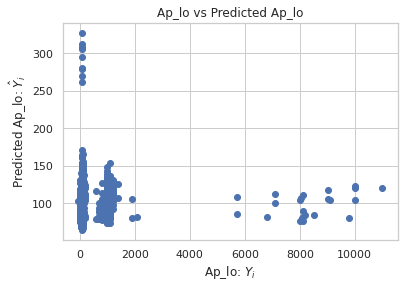

In [51]:
plt.scatter(cardio.Ap_lo, lm.predict(X)) 
plt.xlabel("Ap_lo: $Y_i$")
plt.ylabel("Predicted Ap_lo: $\hat{Y}_i$")
plt.title("Ap_lo vs Predicted Ap_lo")

In [52]:
print(np.sum((cardio.Ap_Hi - lm.predict(X)) ** 2))

1681974590.5490649


In [53]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = cardio.Height[:-50]
Y_test = cardio.Height[-50:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(69950, 12)
(50, 12)
(69950,)
(50,)
